In [1]:
import skimage.io as io
import numpy as np
import os
from glob import glob

%matplotlib inline

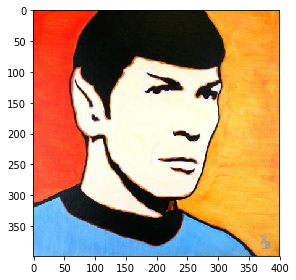

In [2]:
img = io.imread('images/spock_01.jpg')
io.imshow(img)

In [3]:
# Convert the picture into string representation using ndarray.tostring()
string = img.tostring()

# Convert the string back to the image.
# Reconstruction is 1d, so we need sizes of image to fully reconstruct it.
recon_img_1d = np.fromstring(string, dtype=np.uint8)

# Reshape the 1d representation.
recon_img = recon_img_1d.reshape(img.shape)

# Compare reconstructed array to the original one.
np.allclose(img, recon_img)

True

In [4]:
# Getting images for example.
image_files = glob(os.path.join('images', '*.jpg'))
image_files

['images/spock_01.jpg',
 'images/spock_03.jpg',
 'images/spock_02.jpg',
 'images/spock_04.jpg']

In [5]:
# Save images into tfrecords file
import tensorflow as tf

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

tfrecords_filename = 'example_images.tfrecords'
writer = tf.python_io.TFRecordWriter(tfrecords_filename)

original_images = []

for img_path in image_files:
    img = io.imread(img_path)
    
    height = img.shape[0]
    width = img.shape[1]
    
    original_images.append(img)
    
    img_raw = img.tostring()
    
    example = tf.train.Example(features=tf.train.Features(feature={
        'height': _int64_feature(height),
        'width': _int64_feature(width),
        'image_raw': _bytes_feature(img_raw)}))
    
    writer.write(example.SerializeToString())

writer.close()

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:28: DeprecationWarning: PyUnicode_AsEncodedObject() is deprecated; use PyUnicode_AsEncodedString() to encode from str to bytes or PyCodec_Encode() for generic encoding


In [6]:
# Reconstruct images from tfrecords file
reconstructed_images = []

record_iterator = tf.python_io.tf_record_iterator(path=tfrecords_filename)

for string_record in record_iterator:
    example = tf.train.Example()
    example.ParseFromString(string_record)
    
    height = int(example.features.feature['height'].int64_list.value[0])
    width = int(example.features.feature['width'].int64_list.value[0])
    img_string = (example.features.feature['image_raw'].bytes_list.value[0])
    
    img_1d = np.fromstring(img_string, dtype=np.uint8)
    reconstructed_image = img_1d.reshape((height, width, -1))
    
    reconstructed_images.append(reconstructed_image)

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: DeprecationWarning: PyUnicode_AsEncodedObject() is deprecated; use PyUnicode_AsEncodedString() to encode from str to bytes or PyCodec_Encode() for generic encoding
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: PyUnicode_AsEncodedObject() is deprecated; use PyUnicode_AsEncodedString() to encode from str to bytes or PyCodec_Encode() for generic encoding
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:12: DeprecationWarning: PyUnicode_AsEncodedObject() is deprecated; use PyUnicode_AsEncodedString() to encode from str to bytes or PyCodec_Encode() for generic encoding


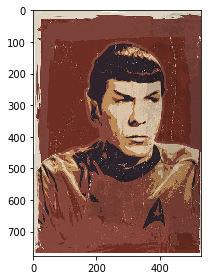

In [7]:
io.imshow(reconstructed_images[1])